In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Import pandas and read the charity_data.csv from the provided cloud URL.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# Dropped column "SPECIAL_CONSIDERATIONS" in model 4 optimization attempt.
# The columns "IS_SUCCESSFUL" will be the target value.
application_df = application_df.drop(columns=["EIN", "NAME", "SPECIAL_CONSIDERATIONS"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE      17
AFFILIATION            6
CLASSIFICATION        71
USE_CASE               5
ORGANIZATION           4
STATUS                 2
INCOME_AMT             9
ASK_AMT             8747
IS_SUCCESSFUL          2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
# Create a new variable to use in the next step, holds the count of each app type.
#print(application_df['APPLICATION_TYPE'].value_counts())
application_counts = application_df["APPLICATION_TYPE"].value_counts()
application_counts

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
# Fill the variable application_type_to_replace, using list() function of app counts less than 100
# in the 7th model attempt, changed the value to < 700.
application_types_to_replace = list(application_counts[application_counts < 700].index)

# Replace in dataframe
# for loop adds the apps from application_types_to_replace together as type "other"
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: count, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#classification_counts[classification_counts > 1]
#classification_counts[classification_counts < 15]
#classification_counts[classification_counts < 20]
#classification_counts[classification_counts < 100]
classification_counts[classification_counts < 1000]
# A steep drop off is present <1000

CLASSIFICATION
C7000    777
C1700    287
C4000    194
C5000    116
C1270    114
        ... 
C4120      1
C8210      1
C2561      1
C4500      1
C2150      1
Name: count, Length: 66, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
# using the variable classifications_to_replace use .list() to create a list of the classifications to replace
classifications_to_replace = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [10]:
# Convert categorical data to numeric with `pd.get_dummies`
dummies_df = pd.get_dummies(application_df)

In [11]:
# Split our preprocessed data into our features and target arrays
# Use columns "IS SUCCESSFUL" as the target data, y value, all else is the X value
# use .drop() to remove the "IS_SUCCESSFUL" column from the df
X = dummies_df.drop(["IS_SUCCESSFUL"], axis= 'columns').values
# X # Verify the data is correct
y = dummies_df["IS_SUCCESSFUL"].values
# y # Verify the data is correct
# Split the preprocessed data into a training and testing dataset
# use the train_test_split function to create two datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# The number on input features should equal the length of the dataset
input_features = len(X_train[0])
# Model Attempt 1
# hidden_1 = Tried 50, 80
# hidden_2 = Tried 20, 50

hidden_1 = 80
hidden_2 = 50
#hidden_3 = 5
#input_features
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_1, input_dim = input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_2, activation="relu"))

# Second hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 80)             │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         4,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,381 (28.83 KB)

 Trainable params: 7,381 (28.83 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
# Train the mode
# Attempt 1 & 2 used 100 epochs. Attempt 3 changed to 50. Attempt 4 changed back to 100.
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7062 - loss: 0.5876
Epoch 2/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7291 - loss: 0.5551
Epoch 3/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7283 - loss: 0.5555
Epoch 4/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7296 - loss: 0.5511
Epoch 5/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7322 - loss: 0.5490
Epoch 6/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7360 - loss: 0.5478
Epoch 7/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7321 - loss: 0.5475
Epoch 8/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7338 - loss: 0.5470
Epoch 9/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7368 - loss: 0.5456
Epoch 10/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7309 - loss: 0.5474
Epoch 11/100
804/804 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7339 - loss: 0.5451
Epoch 12/100
804/804 ━━━━━━━━━━━━━━━━━━━━

In [16]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - 2ms/step - accuracy: 0.7261 - loss: 0.5602
Loss: 0.5601820945739746, Accuracy: 0.726064145565033


In [17]:
# Export our model to HDF5 file
nn.save("Second_AlphabetSoupCharity_Optimization.h5")

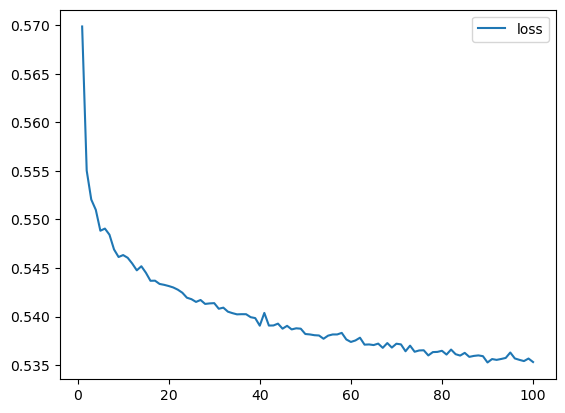

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.savefig("second_alphabet_soup_history.png")
plt.show()

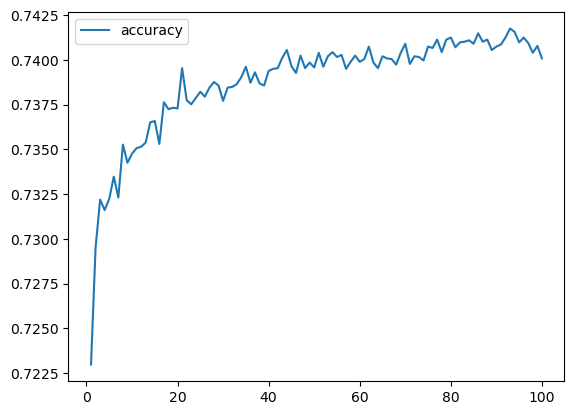

In [22]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.savefig("second_alphabet_soup_accuracy.png")
plt.show()